## Twitter NLP

In [1]:
library(twitteR)
library(tm)
library(wordcloud)
library(RColorBrewer)

Loading required package: NLP

Loading required package: RColorBrewer



In [2]:
ckey <- '_________________________'         
skey <- '_________________________'
token <- '_________________________'
sectoken <- '_________________________'

### Connecting and returning tweets

In [3]:
setup_twitter_oauth(ckey,skey,token,sectoken)
soccer.tweets <- searchTwitter('transfer', n=1000, lang = 'en')

[1] "Using direct authentication"


In [4]:
soccer.text <- sapply(soccer.tweets, function(x) x$getText())

### Cleaning text data

In [5]:
soccer.text <- iconv(soccer.text, 'UTF-8', 'ASCII')
soccer.corpus <- Corpus(VectorSource(soccer.text))

### Document Term Matrix

In [6]:
term.doc.matrix <- TermDocumentMatrix(soccer.corpus, control = list(removePunctuation=T, stopwords=c('transfer','window','http',stopwords('english')), removeNumbers=T,tolower=T))

### Convert object into a matrix

In [7]:
term.doc.matrix <- as.matrix(term.doc.matrix)

### Get word counts

In [8]:
word.freq <- sort(rowSums(term.doc.matrix), decreasing=T)
dm <- data.frame(word=names(word.freq), freq=word.freq)

### Creating the wordcloud

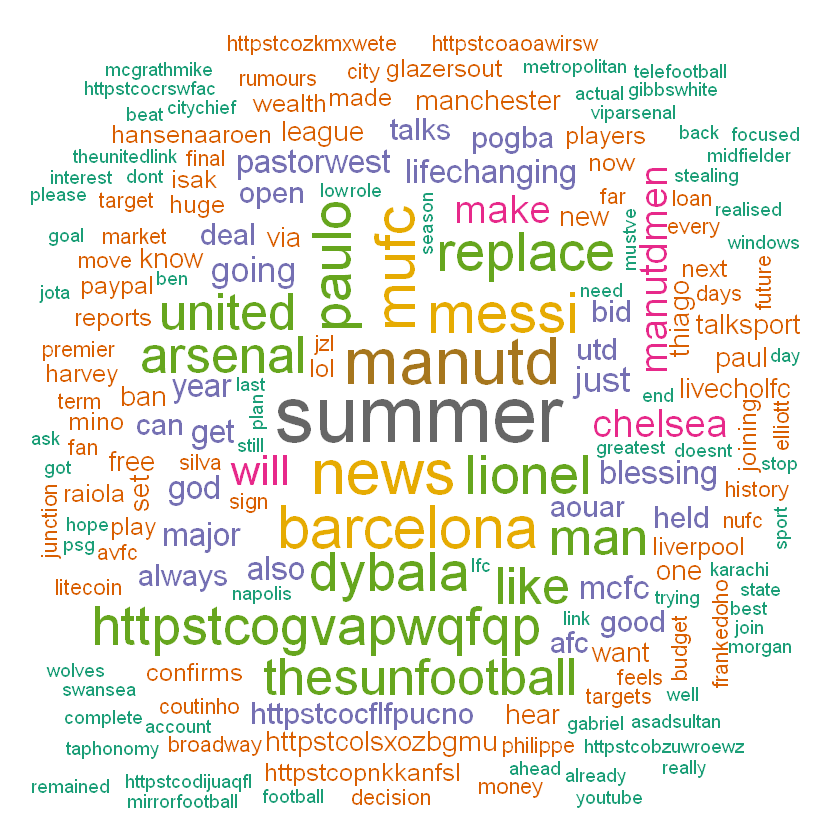

In [9]:
wordcloud(dm$word, dm$freq, random.order=F, colors=brewer.pal(8,'Dark2'))

### END!!!